# <div style="text-align: center"><font color='#dc2624' face='consolas'>Matplotlib 上</font></div>

## <font color='#dc2624' face='微软雅黑'>目录</font><a name='toc'></a>
### 1. [**<font color='#dc2624' face='微软雅黑'>Matplotlib 101</font>**](#1)

### 2. [**<font color='#dc2624' face='微软雅黑'>画图层级</font>**](#2)
1. [<font color='#2b4750' face='微软雅黑'>图 `Figure`</font>](#2.1)
2. [<font color='#2b4750' face='微软雅黑'>坐标系&子图 `Axes & Subplot`</font>](#2.2)
3. [<font color='#2b4750' face='微软雅黑'>坐标轴 `Axis`</font>](#2.3)
4. [<font color='#2b4750' face='微软雅黑'>刻度 `Ticks`</font>](#2.4)
5. [<font color='#2b4750' face='微软雅黑'>基本元素</font>](#2.5)

### 3. [**<font color='#dc2624' face='微软雅黑'>深度探索</font>**](#3)
1. [<font color='#2b4750' face='微软雅黑'>第一幅图</font>](#3.1)
2. [<font color='#2b4750' face='微软雅黑'>默认设置</font>](#3.2)
3. [<font color='#2b4750' face='微软雅黑'>尺寸 & DPI</font>](#3.3)
4. [<font color='#2b4750' face='微软雅黑'>颜色-风格-宽度</font>](#3.4)
5. [<font color='#2b4750' face='微软雅黑'>边界</font>](#3.5)
6. [<font color='#2b4750' face='微软雅黑'>刻度标签</font>](#3.6)
7. [<font color='#2b4750' face='微软雅黑'>图例</font>](#3.7)
8. [<font color='#2b4750' face='微软雅黑'>两条线</font>](#3.8)
9. [<font color='#2b4750' face='微软雅黑'>多图</font>](#3.9)
10. [<font color='#2b4750' face='微软雅黑'>标注</font>](#3.10)
11. [<font color='#2b4750' face='微软雅黑'>透明度</font>](#3.11)
12. [<font color='#2b4750' face='微软雅黑'>其他细节</font>](#3.12)
13. [<font color='#2b4750' face='微软雅黑'>保存图片</font>](#3.13)

### [**<font color='#dc2624' face='微软雅黑'>Matplotlib Cheatsheet</font>**](#cs)
---

<div style="text-align: right">Use a picture. It’s worth a thousand words.</div>
<div style="text-align: right"> — Arthur Brisbane</div>

# <font color='#dc2624' face='微软雅黑'>1. `Matplotlib` 101</font><a name='1'></a>
[<font color='black' face='微软雅黑'>回到目录</font>](#toc)

**`Matplotlib`** 是 **Mat**h **plot** **lib**aray 的缩写，是 Python 中最基本的可视化工具，其官网地址是 https://matplotlib.org/。

在使用 **`Matplotlib`** 之前，需要引进它并检查它的版本，语法如下：

In [63]:
import matplotlib
matplotlib.__version__

'3.2.2'

首先想想平时我们怎么画图，是不是分三步

1. 找画板
2. 用调色板
3. 画画

**`Matplotlib`** 模拟了类似过程，也分三步

1. FigureCanvas
2. Renderer
3. Artist

上面是 **`Matplotlib`** 里的三层 API：

- FigureCanvas 帮你确定画图的地方
- Renderer 帮你把想画的东西展示在屏幕上
- Artist 帮你用 Renderer 在 Canvas 上画图

**FigureCanvas** 和 **Renderer** 两大 API 处理与用户界面工具箱“交流”的所有细节，而 **Artist** 处理所有绘图细节，比如布置图形，文本和线条。对于普通用户，95％ 的时间都是在使用 Artist 的。

先来类比一下人类和 **`Matplotlib`** 画图过程。

<img src="human and matplotlib.png" style="width:600px; height:300px;">

下面代码就是给 `matplotlib` 起了个别名 `mpl`，由于用 `matplotlib.plot` 比较多，也给它起了个别名 `plt`。对于三维图需要从 `mpl_toolkits.mplot3d.axes3d` 引入 `Axes3D`。

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False

魔法指令 `%matplotlib inline` 是帮助在 Jupyter notebook 里面内嵌画图的，如果没有该指令，所有的图都只能通过独立对象而获取，而不能直接显示在代码下面。

在使用 `matplotlib` 之前，首先引入 `datetime`， `numpy` 和 `pandas` 工具包。

In [65]:
import numpy as np
import pandas as pd
from datetime import datetime
np.random.seed(1031)

在画图中，个人偏好百度 Echarts 里面的一组颜色，因此将其 hex 颜色代码定义出来留在后面用。其中**<font color='#dc2624' face='微软雅黑'>红色的 r_hex</font>** 和**<font color='#2b4750' face='微软雅黑'>深青色的 dt_hex</font>** 是大爱。 

In [66]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

<img src="fav color.png" style="width:500px; height:270px;">

用 `print(mpl.rcParams)` 获取可能的配置参数及其当前值的列表。更新参数就像似给字典 `mpl.rcParams` 中的对应项分配新值一样简单，例如

    mpl.rcParams['savefig.dpi'] = 100

另请可用

- `mpl.rc()` 函数用来更新 `mpl.rcParams` 字典
- `mpl.rcdefaults()` 用于恢复默认值。

In [1]:
# print(mpl.rcParams)

In [6]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

In [7]:
mpl.rcParams['figure.dpi']

72.0

# <font color='#dc2624' face='微软雅黑'>2. 画图层级</font><a name='2'></a>
[<font color='black' face='微软雅黑'>回到目录</font>](#toc)

**`Matplotlib`** 是一个巨无霸，咋一看无从下手，只能分解之后各点击破。总体来说，它包含两类元素：

- 基础 (primitives) 类：线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等。
- 容器 (containers) 类：图 (figure), 坐标系 (axes), 坐标轴 (axis) 和刻度 (tick)

基础类元素是我们想画出的标准对象，而容器类元素是基础类元素的寄居出，它们也有层级结构。

        图 → 坐标系 → 坐标轴 → 刻度

<img src="Matplotlib Hierarchy.png" style="width:600px; height:350px;">

由上图看出：

- 图包含着坐标系 (多个)
- 坐标系由坐标轴组成 (横轴 xAxis 和纵轴 yAxis)
- 坐标轴上面有刻度 (主刻度 MajorTicks 和副刻度 MinorTicks)

Python 中万物皆对象，Matplotlib 里这些元素也都是对象。下面代码打印出坐标系、坐标轴和刻度。

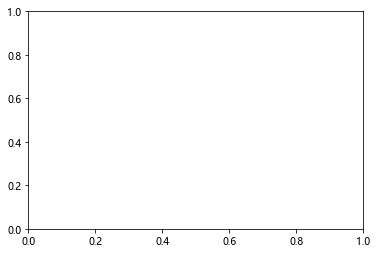

fig.axes: [<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F547EB670>] 

ax.xaxis: XAxis(54.0,36.0)
ax.yaxis: YAxis(54.0,36.0) 

ax.xaxis.majorTicks: [<matplotlib.axis.XTick object at 0x0000024F53EE1430>, <matplotlib.axis.XTick object at 0x0000024F53EE1BB0>, <matplotlib.axis.XTick object at 0x0000024F5478F490>, <matplotlib.axis.XTick object at 0x0000024F54892C10>, <matplotlib.axis.XTick object at 0x0000024F53EB8160>, <matplotlib.axis.XTick object at 0x0000024F547E88E0>] 

ax.yaxis.majorTicks: [<matplotlib.axis.YTick object at 0x0000024F54948A60>, <matplotlib.axis.YTick object at 0x0000024F54948040>, <matplotlib.axis.YTick object at 0x0000024F54892790>, <matplotlib.axis.YTick object at 0x0000024F547E8E80>, <matplotlib.axis.YTick object at 0x0000024F540F38B0>, <matplotlib.axis.YTick object at 0x0000024F52D7CCA0>] 

ax.xaxis.minorTicks: [<matplotlib.axis.XTick object at 0x0000024F525AC280>]
ax.yaxis.minorTicks: [<matplotlib.axis.YTick object at 0x0000024F542485E0>]


In [68]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.show()

xax = ax.xaxis
yax = ax.yaxis

print( 'fig.axes:', fig.axes, '\n')
print( 'ax.xaxis:', xax )
print( 'ax.yaxis:', yax, '\n' )
print( 'ax.xaxis.majorTicks:', xax.majorTicks, '\n' )
print( 'ax.yaxis.majorTicks:', yax.majorTicks, '\n')
print( 'ax.xaxis.minorTicks:', xax.minorTicks )
print( 'ax.yaxis.minorTicks:', yax.minorTicks )

从打印结果可看出坐标系、坐标轴和刻度都是对象。细看一下发现 xaxis 和 yaxis 上面都有 6 个主刻度 (majorTicks)。此外，下面代码显示出坐标系和坐标轴都指向同一个图，从侧面也验证了图、坐标系和坐标轴的层级性。

In [9]:
print( 'axes.figure:', ax.figure )
print( 'xaxis.figure:', xax.figure )
print( 'yaxis.figure:', yax.figure )

axes.figure: Figure(432x288)
xaxis.figure: Figure(432x288)
yaxis.figure: Figure(432x288)


创造完以上四个容器类元素后，便可在它们“身上”添加各种基础类元素。

- 在坐标轴和刻度上添加标签
- 在坐标系中添加线、点、网格、图示、标记和文字
- 在图中添加标题

<img src="Matplotlib Hierarchy Full.png" style="width:600px; height:350px;">

接下来四节分别介绍四大容器类对象，先从”图”开始。

### <font color='#2b4750' face='微软雅黑'>2.1 图 `Figure`</font><a name='2.1'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

图是整个层级的顶端。

### <font color='red' face='微软雅黑'>图中添加文字</font>

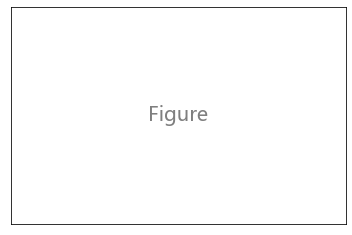

In [73]:
plt.figure()
plt.text( 0.5, 0.5, 'Figure', ha='center', va='center', size=20, alpha=0.5 )
plt.xticks([]), plt.yticks([])
plt.show()

### <font color='red' face='微软雅黑'>图中添加图片</font>

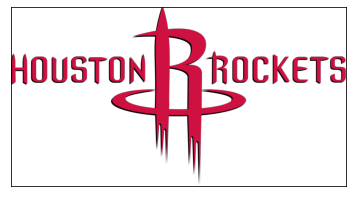

In [11]:
from PIL import Image
plt.figure()
plt.xticks([]), plt.yticks([])
im = np.array(Image.open('Houston Rockets.png'))
plt.imshow(im)
plt.show()

### <font color='red' face='微软雅黑'>图中添加折线</font>

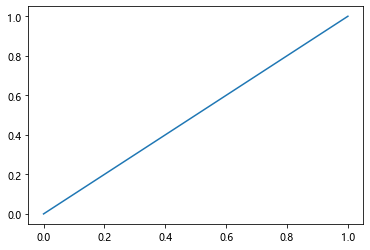

In [12]:
plt.figure()
plt.plot( [0,1],[0,1] )
plt.show()

当每次说画个什么东西，表面上看是在图 (Figure) 中进行的，但实际上是在坐标系 (Axes) 中进行的。一幅图可包含多个坐标系，因此在坐标系里画东西更方便，而且设置更灵活。接着介绍层级中排名第二的”坐标系”。

### <font color='#2b4750' face='微软雅黑'>2.2 坐标系 & 子图 `Axes & Subplot`</font><a name='2.2'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

一幅图 (Figure) 可包含多个坐标系 (Axes)，相当于说一幅图中有多幅子图 (Subplot)，这就引出一个问题，坐标系和子图是不是等价的？在绝大多数情况下是的，但两者有一点细微差别，解释如下：

- 子图在母图中的网格结构一定是规则的
- 坐标系在母图中的网格结构可以是不规则的

### <font color='blue'>子图</font>

将图比作矩阵，那么子图就是矩阵中的元素，语法如下

    subplot( rows, columns, i-th plot )

### 2 $\times$ 1 子图

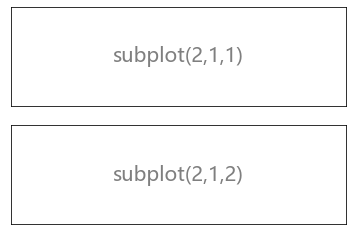

In [74]:
plt.subplot(2,1,1)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center', size=20, alpha=.5 )

plt.subplot(2,1,2)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'subplot(2,1,2)', ha='center', va='center', size=20, alpha=.5 )

plt.show()

### 1 $\times$ 2 子图

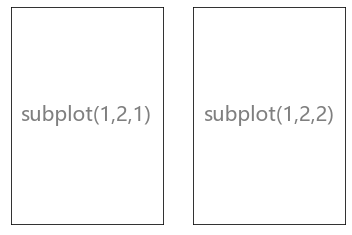

In [76]:
plt.subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'subplot(1,2,1)', ha='center', va='center', size=20, alpha=.5 )

plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'subplot(1,2,2)', ha='center', va='center', size=20, alpha=.5 )

plt.show()

### 2 $\times$ 2 子图

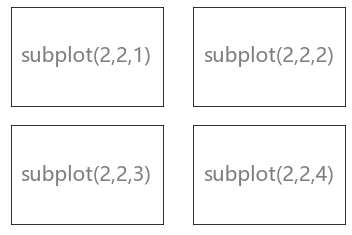

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, ax in enumerate(axes.flat):
    ax.set( xticks=[], yticks=[] )
    s = 'subplot(2,2,' + str(i+1) + ')'
    ax.text( 0.5, 0.5, s, ha='center', va='center', size=20, alpha=.5 )
    
plt.show()

### <font color='blue'>坐标系</font> 

坐标系比子图更通用，可用以下两种生成方式

1. 用 `gridspec` 模块加上 `plt.subplot()` 函数
2. 用 `plt.axes()` 函数

用坐标系来生成多图的也更多样，下面分别看 “不规则网格”、“重叠图”和“大图套小图” 三个样式。

### 不规则网格

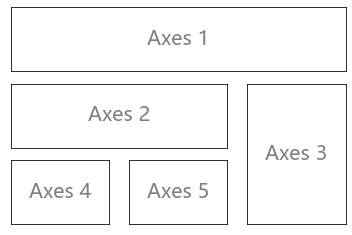

In [16]:
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(G[0, :])
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 1', ha='center', va='center', size=20, alpha=.5 )

ax2 = plt.subplot(G[1, :-1])
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 2', ha='center', va='center', size=20, alpha=.5 )

ax3 = plt.subplot(G[1:, -1])
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 3', ha='center', va='center', size=20, alpha=.5 )

ax4 = plt.subplot(G[-1, 0])
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 4', ha='center', va='center', size=20, alpha=.5 )

ax5 = plt.subplot(G[-1, -2])
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 5', ha='center', va='center', size=20, alpha=.5 )

plt.show()

### 大图套小图

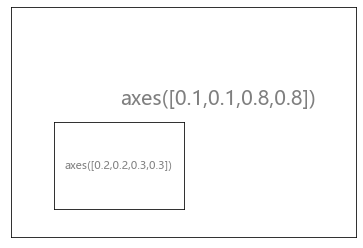

In [17]:
plt.axes([0.1,0.1,0.8,0.8])
plt.xticks([]), plt.yticks([])
plt.text( 0.6, 0.6, 'axes([0.1,0.1,0.8,0.8])', ha='center', va='center', size=20, alpha=.5 )

plt.axes([0.2,0.2,0.3,0.3])
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'axes([0.2,0.2,0.3,0.3])', ha='center', va='center', size=11, alpha=.5 )

plt.show()

### 重叠图

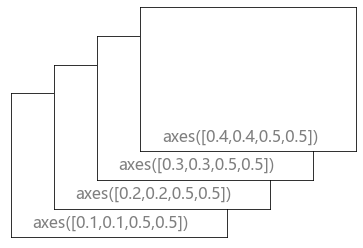

In [18]:
plt.axes([0.1,0.1,0.5,0.5])
plt.xticks([]), plt.yticks([])
plt.text( 0.1, 0.1, 'axes([0.1,0.1,0.5,0.5])', ha='left', va='center', size=16, alpha=.5 )

plt.axes([0.2,0.2,0.5,0.5])
plt.xticks([]), plt.yticks([])
plt.text( 0.1, 0.1, 'axes([0.2,0.2,0.5,0.5])', ha='left', va='center', size=16, alpha=.5 )

plt.axes([0.3,0.3,0.5,0.5])
plt.xticks([]), plt.yticks([])
plt.text( 0.1, 0.1, 'axes([0.3,0.3,0.5,0.5])', ha='left', va='center', size=16, alpha=.5 )

plt.axes([0.4,0.4,0.5,0.5])
plt.xticks([]), plt.yticks([])
plt.text( 0.1, 0.1, 'axes([0.4,0.4,0.5,0.5])', ha='left', va='center', size=16, alpha=.5 )

plt.show()

### 两种方法

介绍完坐标系和子图后，总结两种生成坐标系的方法，即同时生成和有序生成：

**方法 1.** 同时生成图和坐标系

    fig, ax = plt.subplots()
    ax.plot()

**方法 2.** 先生成图，再添加坐标系

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot()

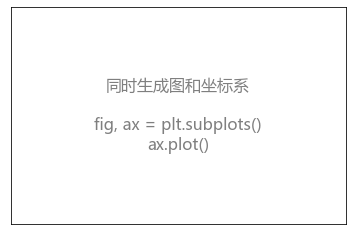

In [19]:
fig, ax = plt.subplots()
ax.set( xticks=[], yticks=[] )
s = '同时生成图和坐标系\n\nfig, ax = plt.subplots()\nax.plot()'
ax.text( 0.5, 0.5, s, ha='center', va='center', size=16, alpha=.5 );

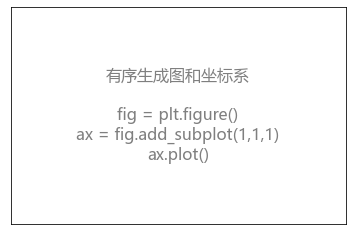

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set( xticks=[], yticks=[] )
s = '有序生成图和坐标系\n\nfig = plt.figure()\nax = fig.add_subplot(1,1,1)\nax.plot()'
ax.text( 0.5, 0.5, s, ha='center', va='center', size=16, alpha=.5 );

接下来看看层级中排名第三的”坐标轴”。

### <font color='#2b4750' face='微软雅黑'>2.3 坐标轴 `Axis`</font><a name='2.3'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

一个二维坐标系有两条坐标轴 (Axis)，横轴或 x 轴 (Xaxis) 和竖轴或 y 轴 (Yaxis)，三维坐标系会多出一个 z轴 (Zaxis)。每个坐标轴都包含两个元素：

- 容器类元素刻度 (tick)，该对象包含刻度本身和刻度标签
- 基础类元素标签 (label)，该对象包含的是坐标轴标签

刻度和标签都是对象，下面代码通过改变它们一些属性值来可视化它们。

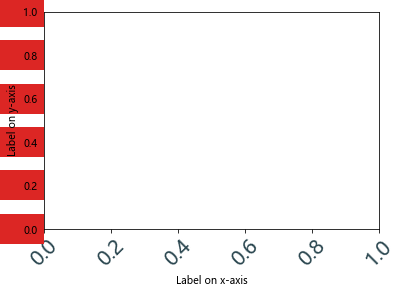

In [77]:
fig, ax = plt.subplots()
ax.set_xlabel('Label on x-axis')
ax.set_ylabel('Label on y-axis')

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color( dt_hex )
    label.set_rotation(45)
    label.set_fontsize(20)

for line in ax.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color( r_hex )
    line.set_markersize(500)
    line.set_markeredgewidth(30)

plt.show()

万物皆对象，坐标轴也一样，下面代码打印 x 轴标签、刻度位置点、刻度线、刻度标签，刻度标签位置和主刻度。

In [78]:
print( ax.xaxis.get_label() )
print( ax.xaxis.get_ticklocs() )
print( ax.xaxis.get_ticklabels() )
print( ax.xaxis.get_ticklines() )
print( ax.xaxis.get_ticks_position() )
print( ax.xaxis.get_major_ticks() )

Text(0.5, 19.199999999999996, 'Label on x-axis')
[0.  0.2 0.4 0.6 0.8 1. ]
<a list of 6 Text major ticklabel objects>
<a list of 12 Line2D ticklines objects>
bottom
[<matplotlib.axis.XTick object at 0x0000024F55D46940>, <matplotlib.axis.XTick object at 0x0000024F55D46040>, <matplotlib.axis.XTick object at 0x0000024F52D73AC0>, <matplotlib.axis.XTick object at 0x0000024F542F7040>, <matplotlib.axis.XTick object at 0x0000024F542F7B20>, <matplotlib.axis.XTick object at 0x0000024F55D13940>]


由上结果可知，在 x 轴上，

- 标签是 Text 对象，字符串为 ‘Label on x-axis’
- 刻度位置点是 [0.  0.2 0.4 0.6 0.8 1. ]
- 刻度线是列表，有 12 个 Line2D 对象的元素，之所以 12 个是因为图的上下横轴都含 6 个 Line2D 对象
- 刻度标签是列表，有 6 个 Text 对象的元素，没有 12 个是因为图上部横轴没开启刻度标签，位置在底部
- 主刻度是一个列表，有 6 个 Xtick 对象的元素

用 `get_property()` 方法可获取坐标轴的属性值，那么用 `set_property()` 方法可设置其属性。

In [23]:
ax.xaxis.set_label('横轴上的刻度')
ax.xaxis.set_ticks_position('top')

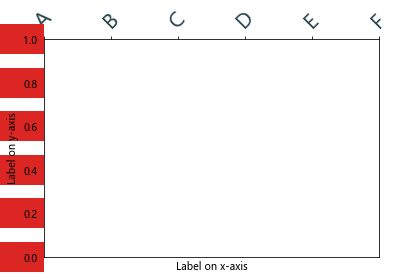

In [24]:
fig, ax = plt.subplots()
ax.set_xlabel('Label on x-axis')
ax.set_ylabel('Label on y-axis')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_ticklabels( [mpl.text.Text(text=i) for i in ['A','B','C','D','E','F']] )

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color( dt_hex )
    label.set_rotation(45)
    label.set_fontsize(20)

for line in ax.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color( r_hex )
    line.set_markersize(500)
    line.set_markeredgewidth(30)

plt.show()

In [25]:
print( [i for i in ax.xaxis.get_ticklabels()] )

[Text(0.0, 1, 'A'), Text(0.2, 1, 'B'), Text(0.4, 1, 'C'), Text(0.6000000000000001, 1, 'D'), Text(0.8, 1, 'E'), Text(1.0, 1, 'F')]


### <font color='#2b4750' face='微软雅黑'>2.4 刻度 `Ticks`</font><a name='2.4'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

刻度 (Tick) 其实在上节已经讲过了，它就是一条短线 (刻度本身) 加上一串字符 (刻度标签)。本节继续深挖刻度，来学习不同类型的刻度用到的 Tick Locators。在每个坐标轴上，都有主刻度 (major tick) 和次刻度 (minor tick) 概念，主刻度通常是大的和常用的，而次刻度通常是小的和不常用的。默认的 **`Matplotlib`** 图很少使用次刻度。为了显示刻度的可视化效果，先编写 `setup(ax)` 函数做点前期工作，该函数主要功能有

- 去除左竖轴 (y 轴)、右竖轴和上横轴
- 去除 y 轴上的刻度
- 将 x 轴上的刻度位置定在轴底
- 设置主刻度和次刻度的长度和宽度
- 设置 x 轴和 y 轴的边界
- 将图中 patch 设成完全透明

In [79]:
import matplotlib.ticker as ticker

In [80]:
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.xaxis.set_ticks_position('bottom')
    
    ax.tick_params(which='major', width=2.00)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    
    ax.patch.set_alpha(0.0)

生成的六幅图：

1. 第一幅是原图
2. 第二幅去除左、右、上轴
3. 第三幅去除 y 轴刻度标签
4. 第四幅改变刻度长度和宽度
5. 第五幅设置坐标轴边界 
6. 第六幅设置图像颜色为黑色，30% 的透明度

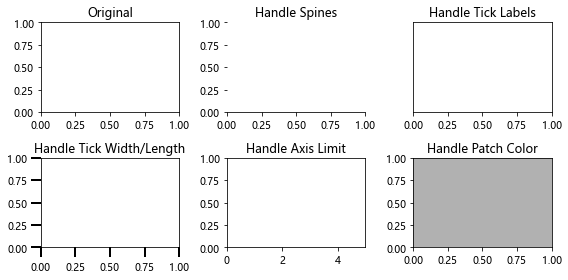

In [84]:
fig, axes = plt.subplots( nrows=2, ncols=3, figsize=(8, 4) )

axes[0,0].set_title('Original')

axes[0,1].spines['right'].set_color('none')
axes[0,1].spines['left'].set_color('none')
axes[0,1].spines['top'].set_color('none')
axes[0,1].set_title('Handle Spines')

axes[0,2].yaxis.set_major_locator(ticker.NullLocator())
axes[0,2].xaxis.set_ticks_position('bottom')
axes[0,2].set_title('Handle Tick Labels')

axes[1,0].tick_params(which='major', width=2.00)
axes[1,0].tick_params(which='major', length=10)
axes[1,0].tick_params(which='minor', width=0.75)
axes[1,0].tick_params(which='minor', length=2.5)
axes[1,0].set_title('Handle Tick Width/Length')
    
axes[1,1].set_xlim(0, 5)
axes[1,1].set_ylim(0, 1)
axes[1,1].set_title('Handle Axis Limit')

axes[1,2].patch.set_color('black')
axes[1,2].patch.set_alpha(0.3)
axes[1,2].set_title('Handle Patch Color')

plt.tight_layout()
plt.show()

函数 `setup(ax)` 将上面效果全部合并，作用就是去掉坐标系里所有元素，只留 x 轴来添加各种刻度。当准备工作做好，下面就可以用不同的 `locator()` 函数在展示不同的刻度对象，常见的刻度有以下 8 种：

- `NullLocator()`: 无刻度
- `MultipleLocator(a)`: 刻度间隔 = 标量 a
- `FixedLocator(a)`: 固定刻度，位置由数组 a 决定
- `LinearLocator(a)`: 刻度数目 = 标量 a，均匀分割刻度
- `IndexLocator(b, o)`: 刻度间隔 = 标量 b，偏移量 = 标量 o
- `MaxNLocator(a)`: 刻度数量最大值为 a
- `AutoLocator()`: MaxNLocator 的特例，nbins 和 steps 使用简单默认值
- `LogLocator(b, n)`: 基数 = 标量 b，按对数分割刻度

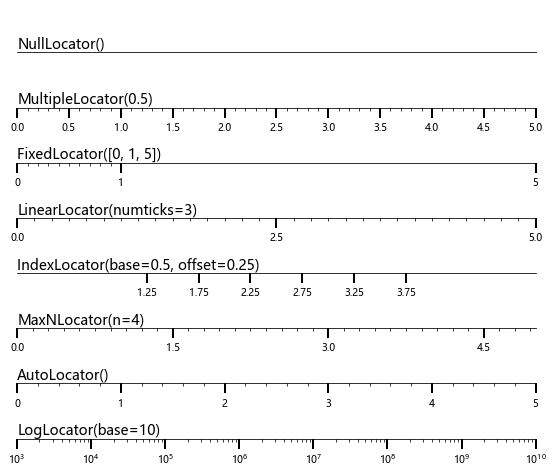

In [29]:
plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14, transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14, transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)", fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(1, 4), [0]*3, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0))
ax.text(0.0, 0.1, "LogLocator(base=10)", fontsize=14, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the bottom spine.
plt.subplots_adjust( left=0.05, right=0.95, bottom=0.05, top=1.05 )

plt.show()

注意 `transform=ax.tranAxes` 做了和坐标系尺寸相关的转换，使得 `text(x,y)` 函数中坐标参数是相对于坐标系而言，如 `text(0.5,0.5)` 会在图中心显示文字，而不是在 (0.5,0.5) 绝对点上显示文字。

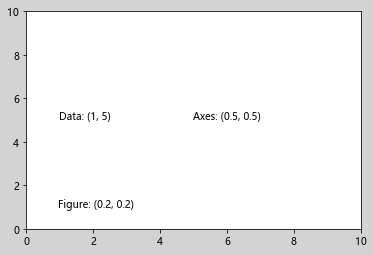

In [85]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData是默认的，这里写出来是为了明确对比
ax.text(1, 5, "Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.5, "Axes: (0.5, 0.5)", transform=ax.transAxes)
ax.text(0.2, 0.2, "Figure: (0.2, 0.2)", transform=fig.transFigure);

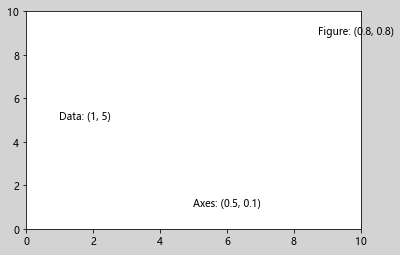

In [86]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData是默认的，这里写出来是为了明确对比
ax.text(1, 5, "Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, "Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.8, 0.8, "Figure: (0.8, 0.8)", transform=fig.transFigure);

### <font color='#2b4750' face='微软雅黑'>2.5 基础元素</font><a name='2.5'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

上节已经介绍完 **`Matplotlib`** 中四个最重要的容器类对象以及它们之间的层级，但要画出一幅“有血有肉”的图，还需要在容器里添加基础元素，比如线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等。这些基础元素都可以用 `plt` 和 `ax` 中名称相同的函数实现，具体来说，

- 画一条线，用 `plt.plot()` 或 `ax.plot()`
- 画个散点，用 `plt.scatter()` 或 `ax.scatter()`
- 添加文字，用 `plt.text()` 或 `ax.text()`
- 添加图例，用 `plt.legend()` 或 `ax.legend()`

但是并不是两者所有基础元素实现的函数名称都相同，比如用于设置极值、标签和标题的函数都有改变，规律也更明显，`ax` 比 `plt` 下的函数名称都多了一个 `set_` 的前缀，举例如下，

- 设置横轴竖轴标签，用 `plt.xlabel()` 或 `ax.set_xlabel()`，`plt.ylabel()` 或 `ax.set_ylabel()`
- 设置横轴竖轴极值，用 `plt.xlim()` 或 `ax.set_xlim()`，`plt.ylim()` 或 `ax.set_ylim()`
- 设置标题，用 `plt.title()` 或 `ax.set_title()`

最后用 **`Matplotlib`** 官网的图来总结所有元素，容器类和基础类，

<img src="anatomy of figure.png" style="width:500px; height:500px;">

现在读者基本理解了 **`Matplotlib`** 里面的绘图逻辑和元素，下两节分别从不同维度 (深度和广度) 研究画图：

- 第 3 节只研究折线图这种类型的图，但根据需求不断更新设置添加元素完善它，深度研究做到完美！
- 第 4 研究如何画合适图、有效图、动态图和立体图，却没在美感上做到完美，广度研究满足需求

# <font color='#dc2624' face='微软雅黑'>3. 深度探索</font><a name='3'></a>
[<font color='black' face='微软雅黑'>回到目录</font>](#toc)

[Back to top](#toc)

本节以大老板让斯蒂文绘图时不断提需求直到把他逼疯，来逐个展示 **`Matplotlib`** 画图函数的灵活性，故事开始。

> 大老板：我是大老板，我要求很高。

> 斯蒂文：我是斯蒂文，我能力很强。

### <font color='#2b4750' face='微软雅黑'>3.1 第一幅图</font><a name='3.1'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：画一幅标准普尔 500 指数 (Standard & Poor 500) 在 2007-2010 年的走势图。

> 斯蒂文：简单，用 **`Pandas`** 读取数据存成数据帧，再用 **`Matplotlib`** 里 `plt.plot()` 函数画线形图。

In [87]:
data = pd.read_csv( 'S&P500.csv', index_col=0, parse_dates=True, dayfirst=True )
data.head(3).append(data.tail(3))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
2019-04-22,2898.780029,2909.510010,2896.350098,2907.969971,2907.969971,2997950000
2019-04-23,2909.989990,2936.310059,2908.530029,2933.679932,2933.679932,3635030000
2019-04-24,2934.000000,2936.830078,2926.050049,2927.250000,2927.250000,3448960000


首先用 `pd.read_csv()` 函数从存好 S&P500.csv 文件中读取数据，S&P 500 的数据从 1950 年 1 月 3 号开始，老板只需要 2007 年 1 月 1 日到 2010 年 1 月 1 日的数据。做个切片即可，切片后的数据帧起名为 spx。

In [88]:
spx = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
spx.head(3).append(spx.tail(3))

,Adj Close
Date,
2007-01-03,1416.599976
2007-01-04,1418.339966
2007-01-05,1409.709961
2009-12-29,1126.199951
2009-12-30,1126.420044
2009-12-31,1115.099976


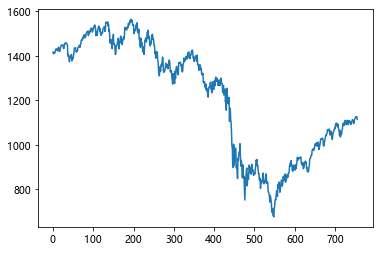

In [89]:
plt.plot( spx.values )
plt.show()

### <font color='#2b4750' face='微软雅黑'>3.2 默认设置</font><a name='3.2'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：这图也太丑了，而且横轴不是日期，我想知道金融危机发生的时点，再改一次！

> 斯蒂文：要求合理，没问题。

在 **`Matplotlib`** 中调整绘图细节的秘诀尽在其属性中，用 `plt.rcParams` 可查看上图的所有默认属性的对应值。

In [90]:
len(plt.rcParams.keys())

302

属性太多总共有 302 个，扫过上面的属性后，斯蒂文决定在图表尺寸 (figsize)，每英寸像素点 (dpi)，线条颜色 (color)，线条风格 (linestyle)，线条宽度 (linewidth)，横纵轴刻度 (xticks, yticks)，横纵轴边界 (xlim, ylim) 这几个方面做改进。既然要做改进，那就先看看它们的默认属性值是多少。

图表尺寸: [6.0, 4.0]
每英寸像素点: 72.0
线条颜色: C0
线条风格: -
线条宽度: 1.5
横轴刻度: [-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]
纵轴刻度: [ 600.  800. 1000. 1200. 1400. 1600. 1800.]
横轴边界: (-37.75, 792.75)
纵轴边界: (632.0990292500001, 1609.58102375)


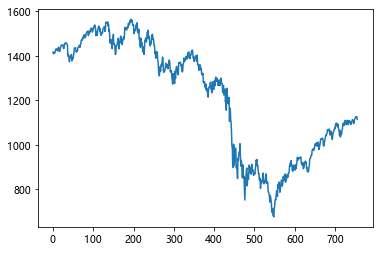

In [91]:
param = plt.rcParams
print( '图表尺寸:', param['figure.figsize'] )
print( '每英寸像素点:', param['figure.dpi'] )
print( '线条颜色:', param['lines.color'] )
print( '线条风格:', param['lines.linestyle'] )
print( '线条宽度:', param['lines.linewidth'] )

fig, ax = plt.subplots()
ax.plot( spx.values )

print( '横轴刻度:', ax.get_xticks() )
print( '纵轴刻度:', ax.get_yticks() )
print( '横轴边界:', ax.get_xlim() )
print( '纵轴边界:', ax.get_ylim() )

斯蒂文现在有个“大胆”的想法，把这些默认属性值都显性地设置出来，画出来的跟什么都没设置生成的图应该是一样的。来验证一下，果然生成的图和之前的图一样。

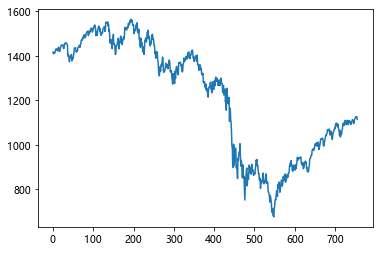

In [92]:
# Create a new figure of size 6x4 points, using 72 dots per inch
plt.figure( figsize=(6, 4), dpi=72 )

# Plot using blue color (C0) with a continuous line of width 1.5 (pixels)
plt.plot( spx.values, color='C0', linewidth=1.5, linestyle='-' )

# Set x ticks
plt.xticks( np.linspace(-100,800,10) )

# Set y ticks
plt.yticks( np.linspace(600,1800,7) )

# Set x limits
plt.xlim(-37.75, 792.75)

# Set y limits
plt.ylim(632.0990292500001, 1609.58102375)

# Show result on screen
plt.show()

> 大老板：。。。两幅图一模一样，但你这不是瞎耽误时间吗？

> 斯蒂文：不这样把默认属性值的显性写出来，怎么知道下一步该如何改进？

### <font color='#2b4750' face='微软雅黑'>3.3 尺寸 & DPI</font><a name='3.3'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：图的尺寸不太对，而且像素也比较低，3 年数据这么长，图还是宽点比较好看。

> 斯蒂文：属性名称在手，改 `figsize` 和 `dpi` 两个属性下的值就行了。

用 `figsize` 和 `dpi` 一起可以控制图的大小和像素。

- 参数 `figsize = (w,h)` 决定图的宽和高 (单位是英寸)。**`Matplotlib`** 中使用的默认值为 (6, 4)

- 参数 `dpi` 全称 dots per inches，即每英寸像素点。**`Matplotlib`** 中使用的默认值为 72，即一英寸包含 72 像素点

改变 figsize 就像改变绘图用的”纸”的大小，增大 (减小) dpi 就像使用放大镜 (望远镜) 看图一样。两个属性一起用，得到图的像素为 (w\*dpi, h\*dpi)，讲 figsize 和 dpi 的默认值带入得到 **`Matplotlib`** 中使用的默认像素 (432, 288)。

如果想获得像素 (1600, 600)，有以下几种参数选择：

1. `figsize = (8, 3), dpi = 200`
2. `figsize = (10, 3.75), dpi = 160`
3. `figsize = (16, 6), dpi = 100`
4. `figsize = (20, 7.5), dpi = 80`

In [93]:
def plot(fs,dpi):
    fig, ax=plt.subplots(figsize=fs, dpi=dpi)
    ax.set_title("Figsize: {}, dpi: {}".format(fs,dpi))
    ax.plot(spx.values, label="Label")
    ax.legend()

首先设置恒定 `figsize` 但变动 `dpi`，发现 dpi 越大，线条越宽，字越大，图越清楚。

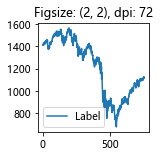

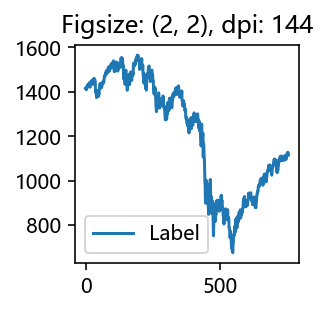

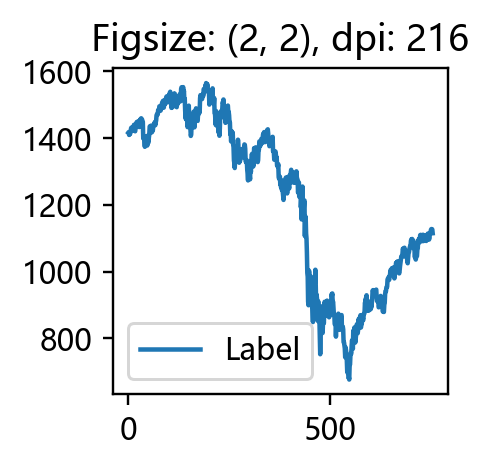

In [94]:
figsize=(2,2)
for i in range(1,4):
    plot(figsize, i*72)

接着设置恒定 `dpi` 但变动 `figsize`，给的视觉效果仅仅只有图变大，清晰度不变。

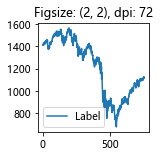

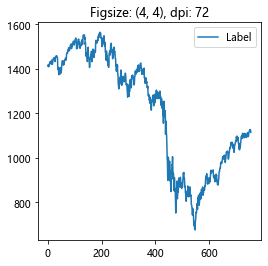

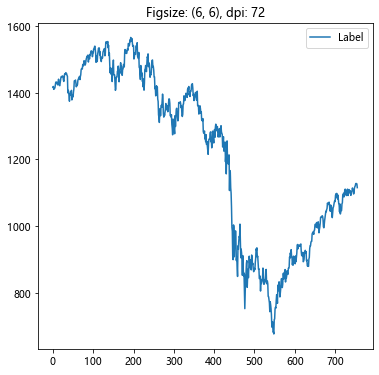

In [95]:
dpi=72
for i in [2,4,6]:
    plot((i,i), dpi)

在本节后面将 `figsize` 设置成 16×6，`dpi` 设置为 100。

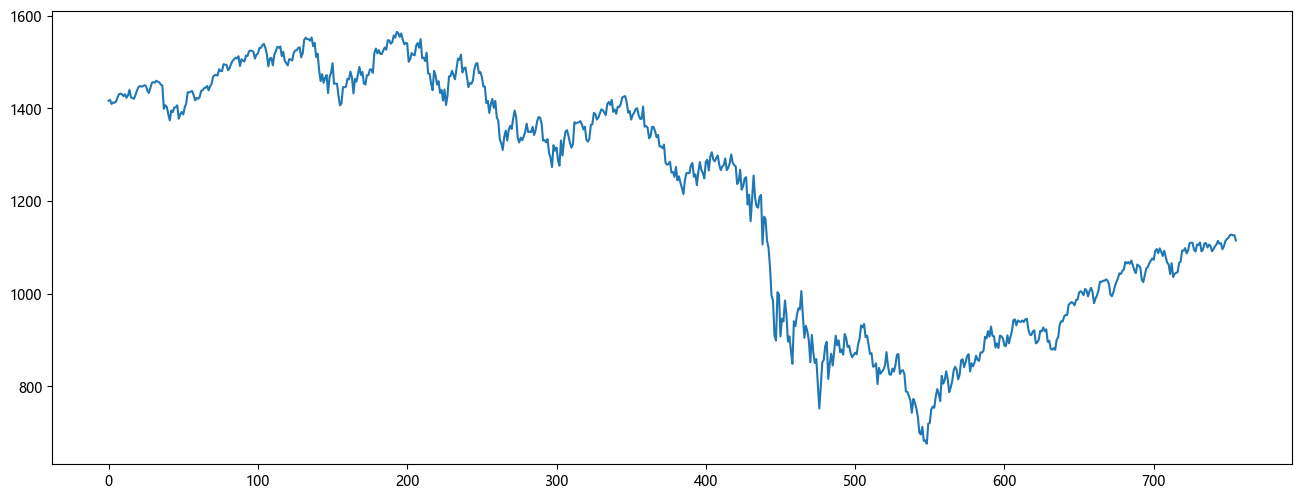

In [96]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values )
plt.show()

### <font color='#2b4750' face='微软雅黑'>3.4 颜色-风格-宽度</font><a name='3.4'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：线条有点纤细，这种蓝色也不高雅。

> 斯蒂文：纤细？不高雅？Excuse me？不过只需改参数 color, linewidth 和 linestyle 的值就能满足需求。

参数 color 可用字符串、字符串简写、灰阶、Hex，RGB 等形式来设置。

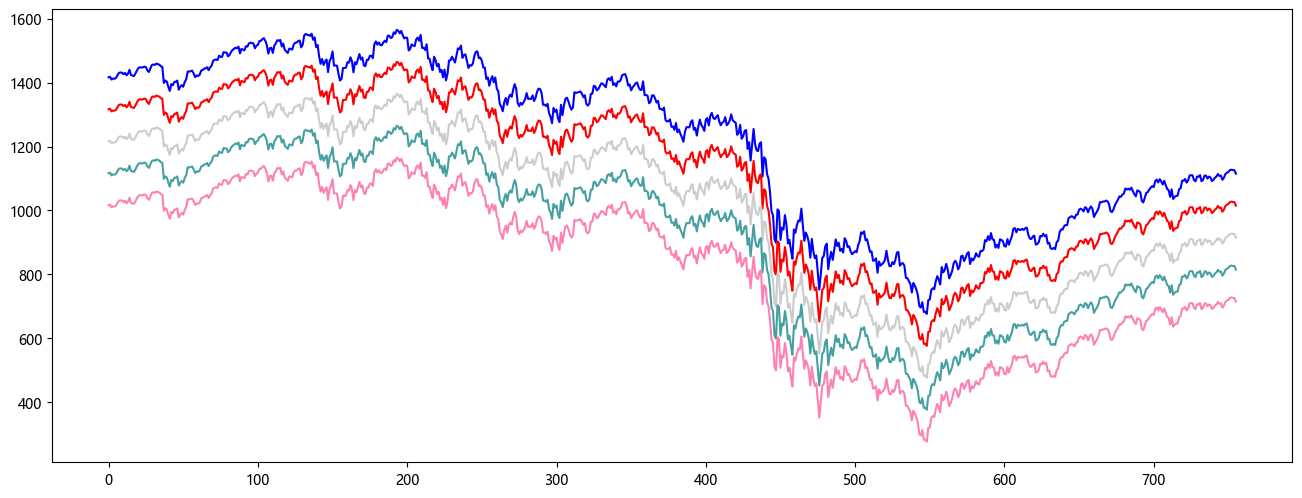

In [42]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values, color='blue' )
plt.plot( spx.values-100, color='r' )
plt.plot( spx.values-200, color='0.8' )
plt.plot( spx.values-300, color='#45a0a2' )
plt.plot( spx.values-400, color=(1,0.5,0.7) )
plt.show()

参数 linestyle 可用符号或者字符串名称来设置，参数 linewidth 直接用数值来设置。

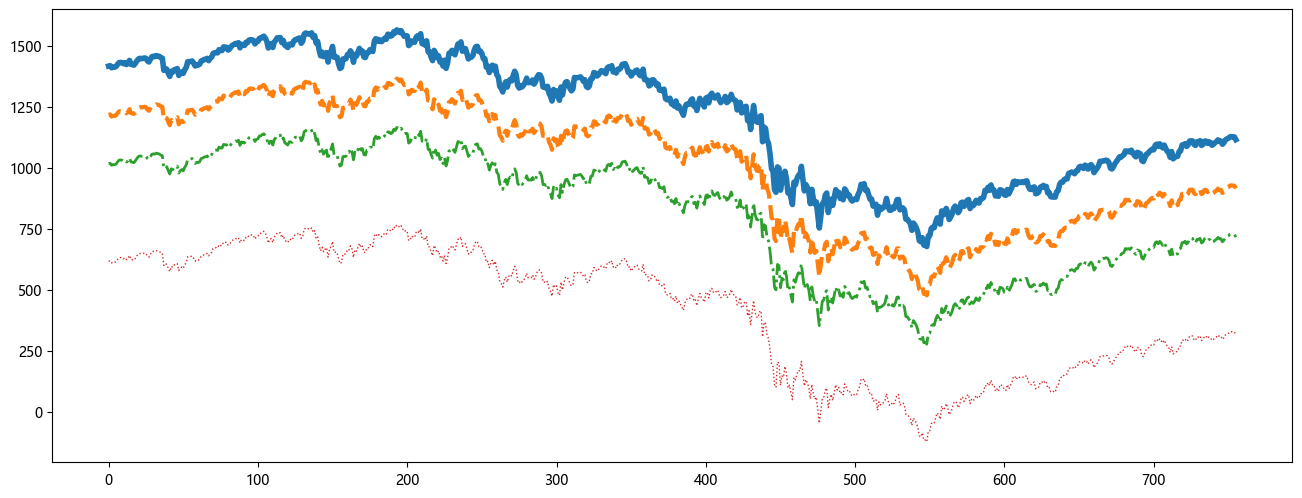

In [43]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values, linestyle='-', linewidth=4 )
plt.plot( spx.values-200, linestyle='--', linewidth=3 )
plt.plot( spx.values-400, linestyle='-.', linewidth=2 )
plt.plot( spx.values-800, linestyle=':', linewidth=1 )
plt.show()

回到本例，在 `plt.plot()` 函数中设置参数来控制折线的颜色 (深青色 '#2b4750')、宽度 (2 像素) 和风格 (连续线)。

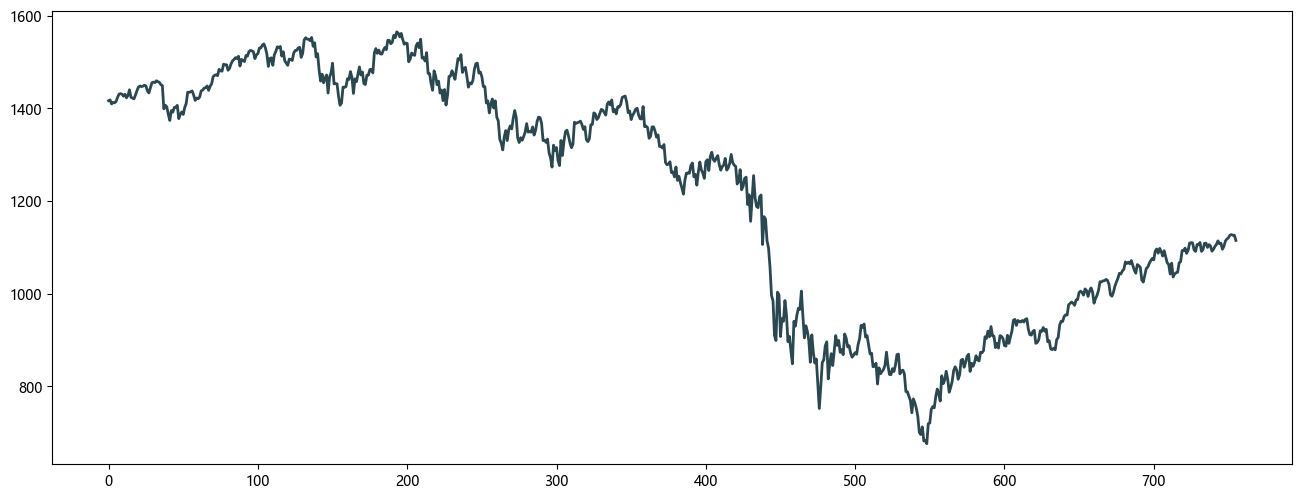

In [97]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values, color=dt_hex, linewidth=2, linestyle='-' )
plt.show()

### <font color='#2b4750' face='微软雅黑'>3.5 边界</font><a name='3.5'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：横轴怎么是数字，不应该是日期么？另外这条线快碰到天花板了。

> 斯蒂文：这个需求合理，设置下横轴和纵轴的边界就可以了。

简单做法就是先生成坐标系 ax，之后在 ax 里操作。比如在 `ax.plot(x,y)` 函数传入日期 x 使得横轴显示的日期标签，在 `ax.set_ylim()` 函数中设置纵轴边界，下界和上界分别为 spx 的最小值 0.8 倍和最大值 1.2 倍，使得 spx 图离顶部底部都有些空间。

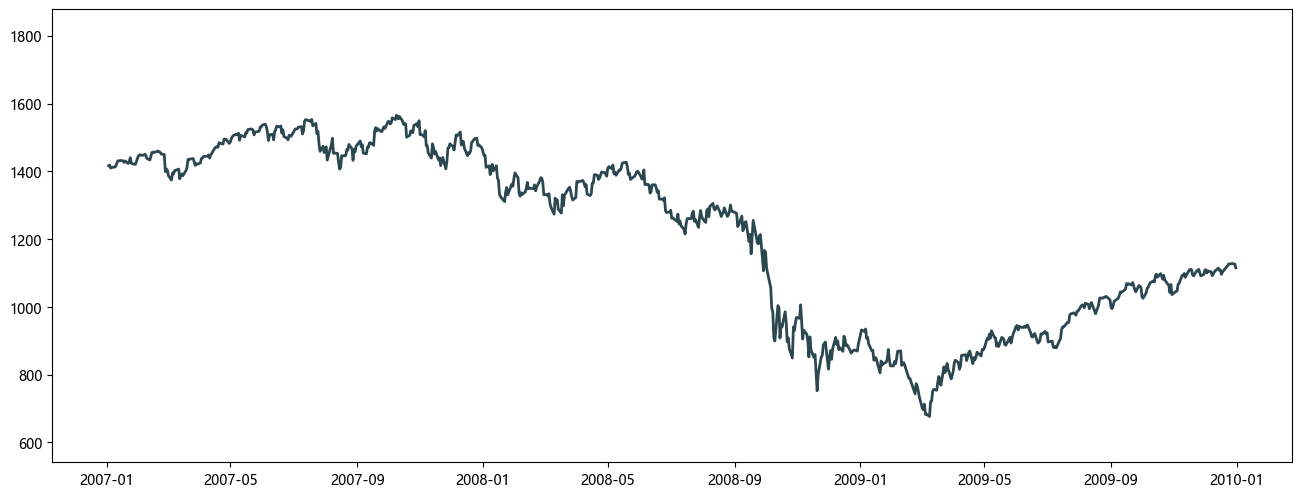

In [45]:
fig, ax = plt.subplots(figsize=(16,6), dpi=100 )
x, y = spx.index, spx.values
ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-' )
ax.set_ylim( y.min()*0.8, y.max()*1.2 );

### <font color='#2b4750' face='微软雅黑'>3.6 刻度标签</font><a name='3.6'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：横轴日期隔得有点开，而且只有年月，没有日。

> 斯蒂文：没有日？Interesting 😊

上图横轴的刻度个数 (老板说日期隔得有点开) 和标签显示 (老板说只有年月) 都是默认设置。为了满足老板的要求，斯蒂文只能手动设置，使用以下两个函数：

- 先在 `ax.set_ticks()` 函数中设置出数值刻度
- 再在 `ax.set_xticklabels()` 函数中对应的数值刻度上设置标签

首先设定横轴边界 [-1, len(x) +1]，然后设置横轴”数值刻度”为 range(0, len(x), 40)，即 0, 40, 80, ....

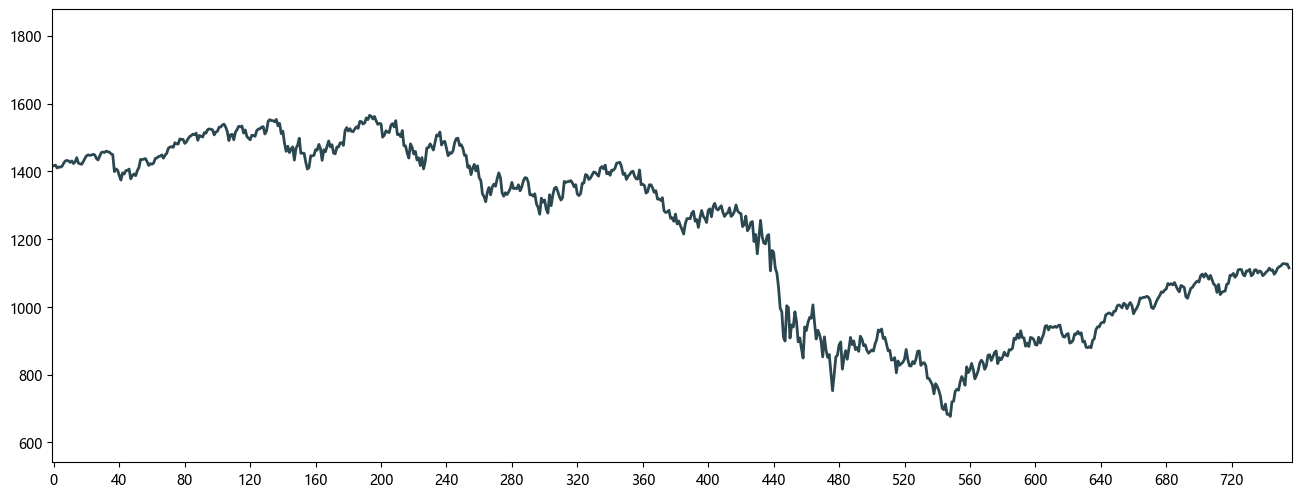

In [46]:
fig, ax = plt.subplots(figsize=(16,6), dpi=100 )
x, y = spx.index, spx.values
ax.plot( y, color=dt_hex, linewidth=2, linestyle='-' )

ax.set_xlim(-1, len(x)+1)
ax.set_ylim( y.min()*0.8, y.max()*1.2 )

ax.set_xticks( range(0,len(x),40) );

接着在这些”数值刻度”位置上写标签，即格式为 %Y-%m-%d 的日期。由于日期个数较多，而且日期字符较长，直接在图中显示会相互重叠非常难看。调节参数 `rotation = 90` 使得日期逆时针转 90 度

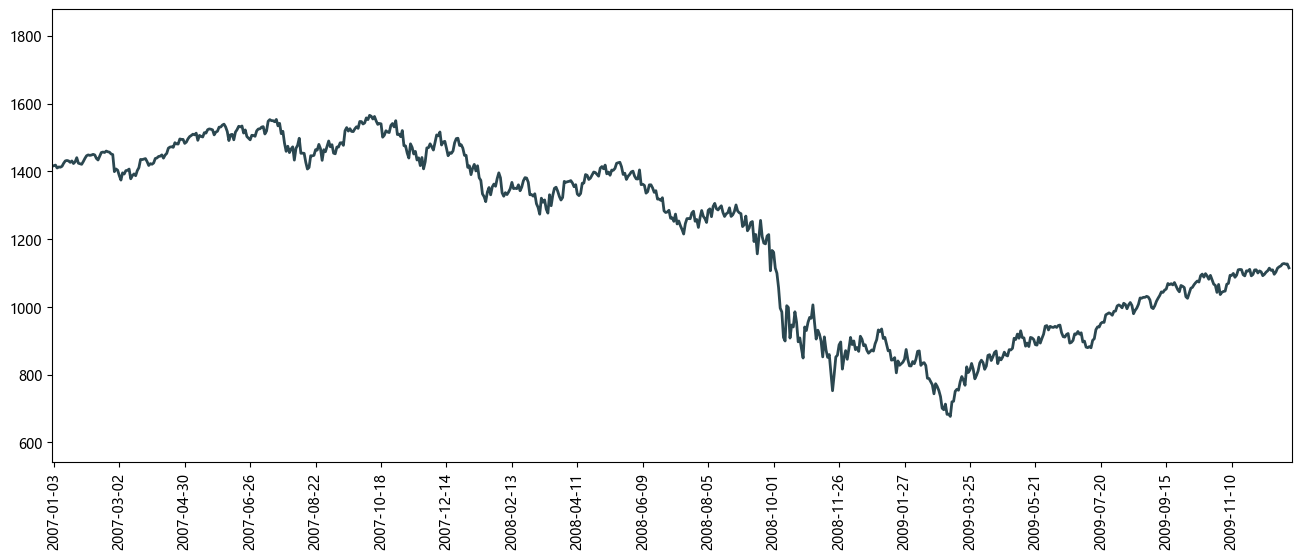

In [99]:
fig, ax = plt.subplots(figsize=(16,6), dpi=100 )
x, y = spx.index, spx.values
ax.plot( y, color=dt_hex, linewidth=2, linestyle='-' )

ax.set_xlim(-1, len(x)+1)
ax.set_ylim( y.min()*0.8, y.max()*1.2 )

ax.set_xticks( range(0,len(x),40) )
ax.set_xticklabels( [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()], \
                    rotation=90 );

### <font color='#2b4750' face='微软雅黑'>3.7 图例</font><a name='3.7'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：怎么没有图例？能不能专业一点？

> 斯蒂文：这不是 S&P 500 吗？一条时间序列要啥图例？难道接下来要画两条序列？

添加图例 (legend) 非常简单，分两步：

- 在 `ax.plot()` 函数中设定参数 label，传入想显示的字符串比如 ‘S&P500’
- 在 `ax.legend()` 函数中 (该函数会和之前设定的 label 联系起来)

    - 设定参数 `loc = 0` (默认安排最好位置显示图例)
    - 设定参数 `frameon = True` 给图例加了外框

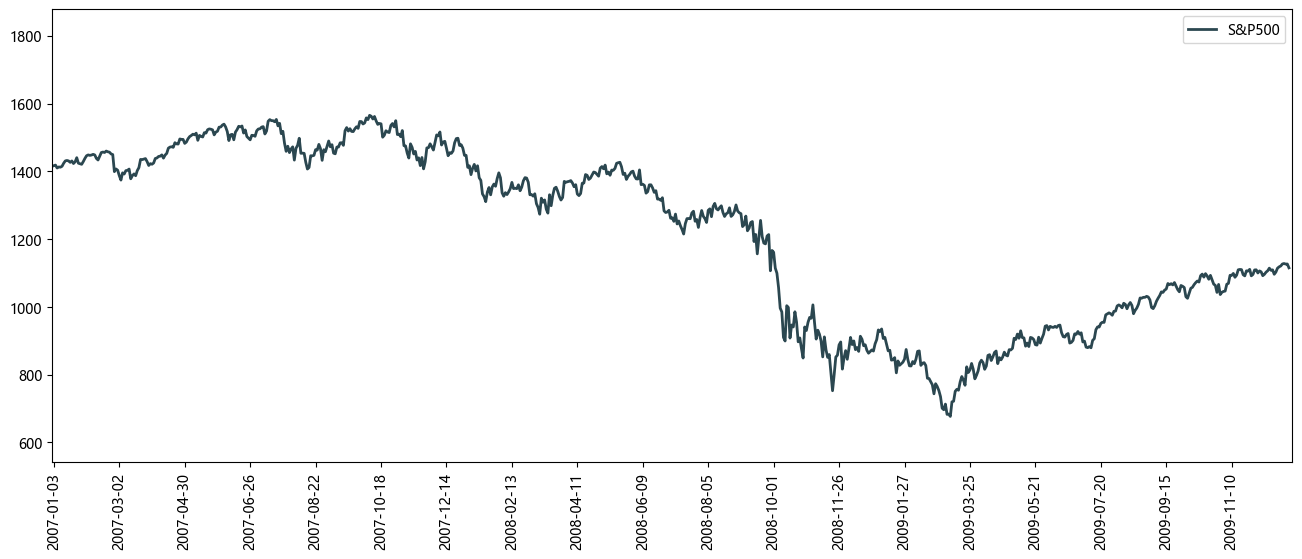

In [102]:
fig, ax = plt.subplots(figsize=(16,6), dpi=100 )
x, y = spx.index, spx.values
ax.plot( y, color=dt_hex, linewidth=2, linestyle='-', label='S&P500' )
ax.legend( loc=0, frameon=True )

ax.set_xlim(-1, len(x)+1)
ax.set_ylim( y.min()*0.8, y.max()*1.2 )

ax.set_xticks( range(0,len(x),40) )
ax.set_xticklabels( [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()], rotation=90 );

### <font color='#2b4750' face='微软雅黑'>3.8 两条线</font><a name='3.8'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：对，就是要画两条序列，把恐慌指数 VIX 也加进去。

> 斯蒂文：不扶墙就服你，但这个需求太简单。

In [103]:
data = pd.read_csv( 'VIX.csv', index_col=0, parse_dates=True, dayfirst=True )
vix = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
vix.head(3).append(vix.tail(3))

,Adj Close
Date,
2007-01-03,12.040000
2007-01-04,11.510000
2007-01-05,12.140000
2009-12-29,20.010000
2009-12-30,19.959999
2009-12-31,21.680000


添加第二幅图也很简单，用 `ax.plot()` 函数两遍即可，一个用于 spx，一个用于 vix。

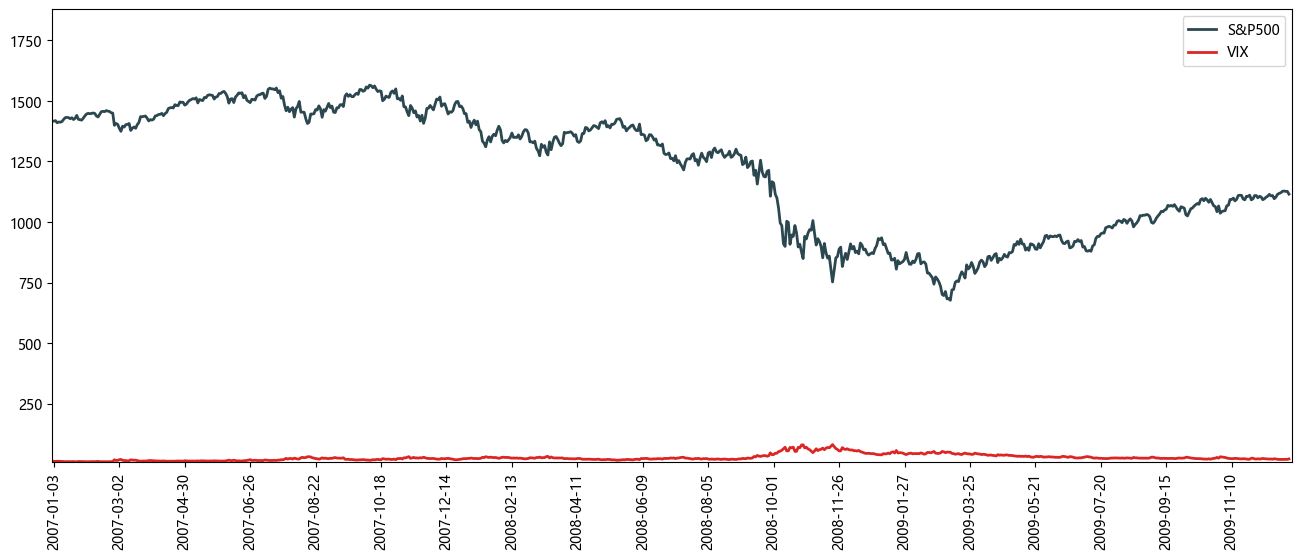

In [104]:
fig, ax = plt.subplots(figsize=(16,6), dpi=100 )
x, y1, y2 = spx.index, spx.values, vix.values

ax.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500' )
ax.plot( y2, color=r_hex, linewidth=2, linestyle='-', label='VIX' )
ax.legend( loc=0, frameon=True )

ax.set_xlim(-1, len(x)+1)
ax.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )

ax.set_xticks( range(0,len(x),40) )
ax.set_xticklabels( [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()], rotation=90 );

### <font color='#2b4750' face='微软雅黑'>3.9 多图</font><a name='3.9'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：图画成这个鬼样子还好意思给我看？

> 斯蒂文：知道问题出哪了，S&P500 的量纲都是千位数，而 VIX 的量纲是两位数，两者放在一起显得 VIX 就像一条水平线。

在一张图绘制量纲差异很大的数据有两种方式：

1. 用两个坐标系
2. 用两幅子图

### 两个坐标系

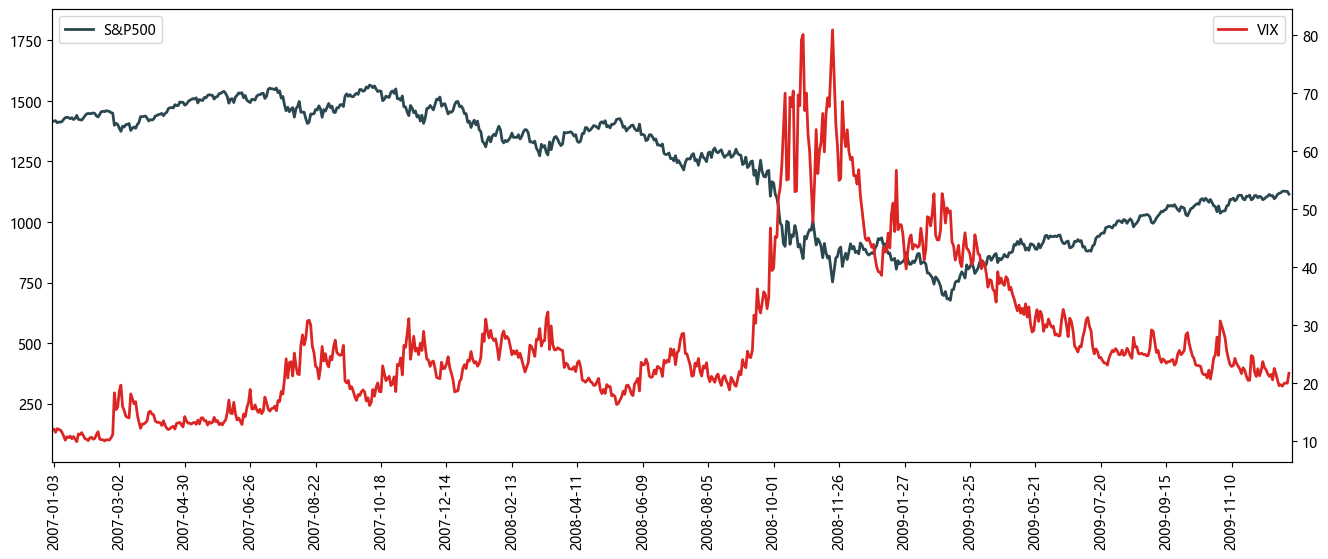

In [51]:
fig, ax1 = plt.subplots(figsize=(16,6), dpi=100 )
x, y1, y2 = spx.index, spx.values, vix.values

ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500' )
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )

x_tick = range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks( x_tick )
ax1.set_xticklabels( x_label, rotation=90 )
ax1.legend( loc='upper left', frameon=True )

ax2 = ax1.twinx()
ax2.plot( y2, color=r_hex, linewidth=2, linestyle='-', label='VIX' )
ax2.legend( loc='upper right', frameon=True );

两个图例分开放了，要把它们放在一起，使用 `plt.legend()`。

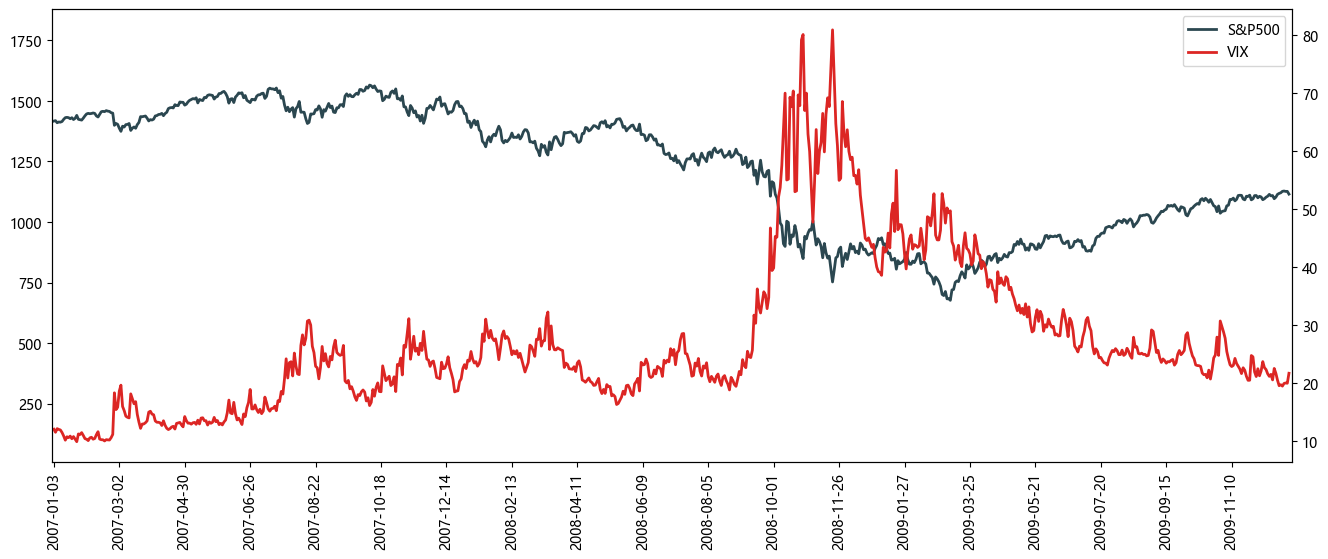

In [106]:
fig, ax1 = plt.subplots(figsize=(16,6), dpi=100 )
x, y1, y2 = spx.index, spx.values, vix.values

line1 = ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500' )
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )
x_tick = range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks( x_tick )
ax1.set_xticklabels( x_label, rotation=90 )

ax2 = ax1.twinx()
line2 = ax2.plot( y2, color=r_hex, linewidth=2, linestyle='-', label='VIX'  )

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend( lines, labels, loc=0, frameon=True );

### 两幅子图

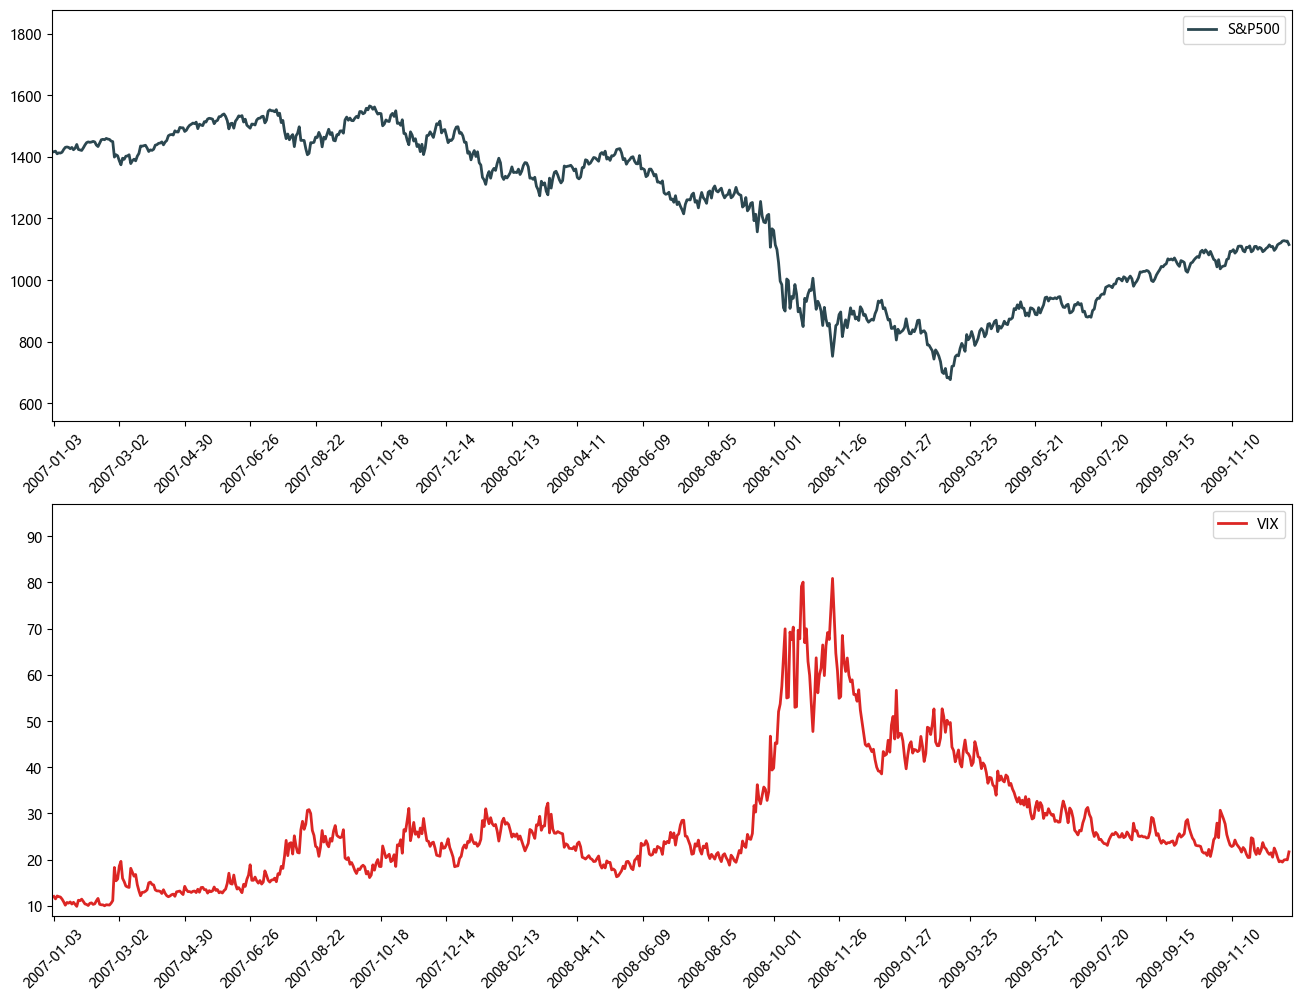

In [53]:
plt.figure( figsize=(16,12), dpi=100 )
x, y1, y2 = spx.index, spx.values, vix.values

# subplot 1
plt.subplot(2,1,1)
plt.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500' )
plt.xlim(-1, len(x)+1)
plt.ylim( y1.min()*0.8, y1.max()*1.2 )

x_tick = range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
plt.xticks( x_tick, x_label, rotation=45 )
plt.legend( loc='upper right', frameon=True )

# subplot 2
plt.subplot(2,1,2)
plt.plot( y2, color=r_hex, linewidth=2, linestyle='-', label='VIX' )
plt.xlim(-1, len(x)+1)
plt.ylim( y2.min()*0.8, y2.max()*1.2 )

plt.xticks( x_tick, x_label, rotation=45 )
plt.legend( loc='upper right', frameon=True )

plt.show()

### <font color='#2b4750' face='微软雅黑'>3.10 标注</font><a name='3.10'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

在金融危机时期，市场发生了五件大事，分别是

    2017-10-11: Peak of bull market / 牛市顶点
    2008-03-12: Bear Sterns Fails / 贝尔斯登倒闭
    2008-09-15: Lehman Bankcurpty / 雷曼兄弟倒闭
    2009-01-20: RBS Sell-off / 苏格兰皇家银行股票抛售
    2009-04-02: G20 Summit / G20 峰会

> 大老板：我想看到这五个事件标注在 S&P 500 的走势图上。

> 斯蒂文：你想，你想，你想得美，哎，还是要做，谁叫你是老板。

代码 4-8 行用列表定义危机事件，每个事件是“时间+名称”元组格式。

代码 19-27 行用 for 循环来标注事件。

- 获取每一个 date 在整个日期数组中的索引 xi，以及对应的 spx 值 yi，用 scatter() 函数画点代表事件
- 用 annotate() 函数里设置了事件 (label)，箭头坐标 (xy)，事件坐标 (xytext)，箭头性质 (arrowprops)，水平对齐 (horizontalalignment) 和竖直对齐 (verticalalignment) 等属性。

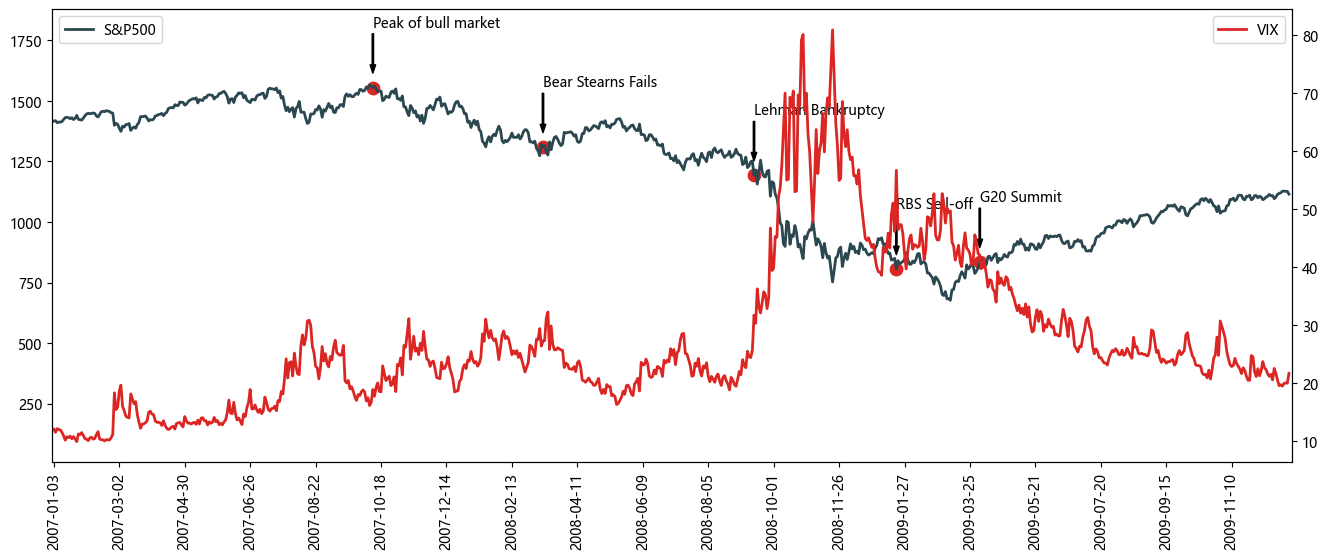

In [109]:
fig, ax1 = plt.subplots(figsize=(16,6), dpi=100 )
x, y1, y2 = spx.index, spx.values, vix.values

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
               (datetime(2009, 1, 20), 'RBS Sell-off'),
               (datetime(2009, 4, 2), 'G20 Summit')]

ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500' )
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )
x_tick = range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks( x_tick )
ax1.set_xticklabels( x_label, rotation=90 )
ax1.legend( loc='upper left', frameon=True )

for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    xi = x.get_loc(date)
    yi = spx.asof(date)
    ax1.scatter( xi, yi, 80, color=r_hex )
    ax1.annotate( label, xy=(xi, yi + 60),
                  xytext=(xi, yi + 300),
                  arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                  horizontalalignment='left', verticalalignment='top' )

ax2 = ax1.twinx()
ax2.plot( y2, color=r_hex, linewidth=2, linestyle='-', label='VIX' )
ax2.legend( loc='upper right', frameon=True );

### <font color='#2b4750' face='微软雅黑'>3.11 透明度</font><a name='3.11'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：S&P 500 和 VIX 画在一起太混乱了，而且事件标注也看不清。在信息不能少的前提下再改进！

> 斯蒂文：S&P 500 是主线，VIX 是副线，把副线的透明度调高点即可。

设置 `ax2.plot()` 里 `alpha` 参数即可，经过调试发现设为 0.3 视觉效果最佳。

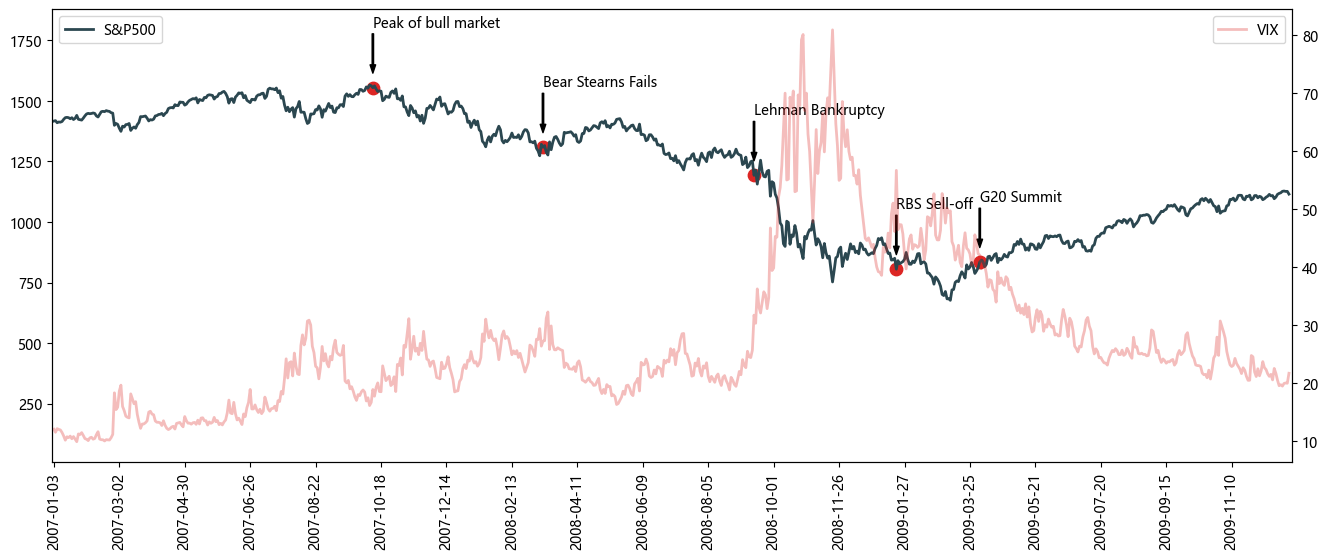

In [55]:
fig, ax1 = plt.subplots(figsize=(16,6), dpi=100 )
x, y1, y2 = spx.index, spx.values, vix.values

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
               (datetime(2009, 1, 20), 'RBS Sell-off'),
               (datetime(2009, 4, 2), 'G20 Summit')]

ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P500' )
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )
x_tick = range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks( x_tick )
ax1.set_xticklabels( x_label, rotation=90 )
ax1.legend( loc='upper left', frameon=True )

for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    xi = x.get_loc(date)
    yi = spx.asof(date)
    ax1.scatter( xi, yi, 80, color=r_hex )
    ax1.annotate( label, xy=(xi, yi + 60),
                  xytext=(xi, yi + 300),
                  arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                  horizontalalignment='left', verticalalignment='top' )

ax2 = ax1.twinx()
ax2.plot( y2, color=r_hex, linewidth=2, linestyle='-', label='VIX', alpha=0.3 )
ax2.legend( loc='upper right', frameon=True );

美如画！雷曼兄弟倒闭 (事件 3) 后 S&P 暴跌最厉害，而同期的 VIX 也飙到天际。在 G20 峰会 (事件 5) 过后，大国领导者一起解决金融危机问题，从那个时点开始，S&P500 上涨 VIX 下跌。

### <font color='#2b4750' face='微软雅黑'>3.12 其他细节</font><a name='3.12'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

> 大老板：基本满意，你自由发挥看看还有什么可以改进的地方。

> 斯蒂文：别介，我最怕这种开放式要求 。。。

既然老板关注这五个事件，而它们发生的日期可能没有落在横轴标签上，那老板在图上还是找不到事件发生的具体时间。此外代表事件的点被 S&P 500 的折线“挡住了”，事件更重要些应该“摆放在”折线的前面而不是后面。最后一幅完整的图需要有个标题，和横轴纵轴上的标签。

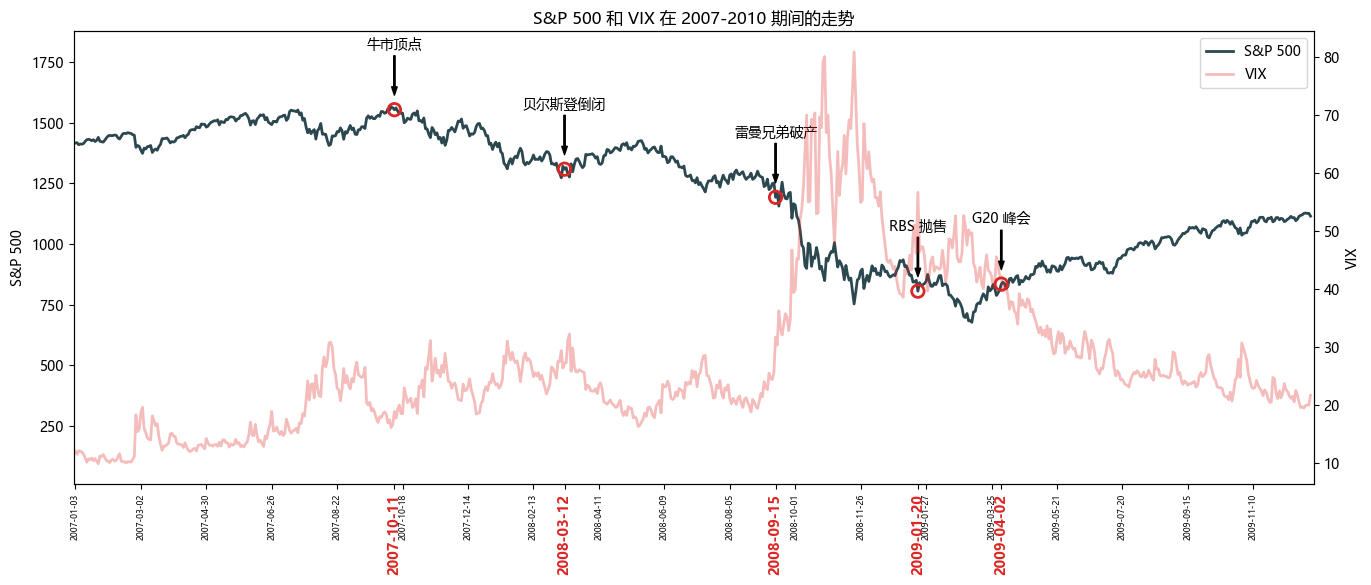

In [56]:
fig, ax1 = plt.subplots(figsize=(16,6), dpi=100 )
x, y1, y2 = spx.index, spx.values, vix.values

crisis_data = [(datetime(2007, 10, 11), '牛市顶点'),
               (datetime(2008, 3, 12), '贝尔斯登倒闭'),
               (datetime(2008, 9, 15), '雷曼兄弟破产'),
               (datetime(2009, 1, 20), 'RBS 抛售'),
               (datetime(2009, 4, 2), 'G20 峰会')]

line1 = ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500', zorder=0 )
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )
ax1.set_ylabel('S&P 500')

init_tick = list( range(0,len(x),40) )
impt_tick = []
impt_date = []

for date, label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    impt_date.append(date)
    
    xi, yi = x.get_loc(date), spx.asof(date)
    impt_tick.append(xi)
    
    ax1.scatter( xi, yi, 80, color=r_hex, facecolors='none', linewidth=2, zorder=1 )
    ax1.annotate( label, xy=(xi, yi + 60), xytext=(xi, yi + 300),
                  arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6),
                  horizontalalignment='center', verticalalignment='top' )

x_tick = init_tick+impt_tick
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks( x_tick )
ax1.set_xticklabels( x_label, rotation=90 )

for i, label in enumerate(ax1.get_xticklabels()):
    if i >= len(init_tick):
        label.set_color(r_hex)
        label.set_fontweight('bold')
    else:
        label.set_fontsize(6)
    
# Add a second axes
ax2 = ax1.twinx()
line2 = ax2.plot( y2, color=r_hex, linewidth=2, linestyle='-', label='VIX', alpha=0.3 )
ax2.set_ylabel('VIX')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend( lines, labels, loc=0, frameon=True );
plt.title('S&P 500 和 VIX 在 2007-2010 期间的走势');

现在这图已经非常好看了，而且该传递的消息都传递了。

- 用 `zorder` 来控制叠放顺序，S&P 500 折线的 `zorder=0`，放在后面；而散点的 `zorder=1`，放在前面
- 用 `ax.label()` 函数对双纵轴添加描述
- 用 `plt.title()` 函数添加图标题
- 在 `scatter()` 函数中设置参数 `facecolors='none'` 使得散点为空心
- 创建一个列表专门储存这五个事件的日期，然后遍历 `ax1.get_xticklabels()`，如果是这五个日期，调成粗体红字，如果不是，缩小字体为 6 (原来是 9) 

还有其他一些细节调整，比如把事件的英文名改成中文名，比如把事件标记和箭头水平对齐等等。

> 大老板：现在的图才像话嘛，晚上下面加个蛋奖励一下自己。

> 斯蒂文：X@#$@*&&@!

### <font color='#2b4750' face='微软雅黑'>3.13 保存图片</font><a name='3.13'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#3)

绘制完图后，使用 `savefig()` 函数将其存储成自己想要的格式，比如 PNG 文件，起名为 financial_crisis.png，如果想保存为高像素，可以设置将 dpi 值设高点。

In [57]:
fig.savefig('financial_crisis.png', dpi=400)

注：查看图片格式可用 `fig.canvas.get_supported_filetypes()` 方法。

In [58]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

这时图片会存在当前工作路径中。为了确保该图已经存好，可用 `IPython.display` 中 `Image` 模块加载并显示。

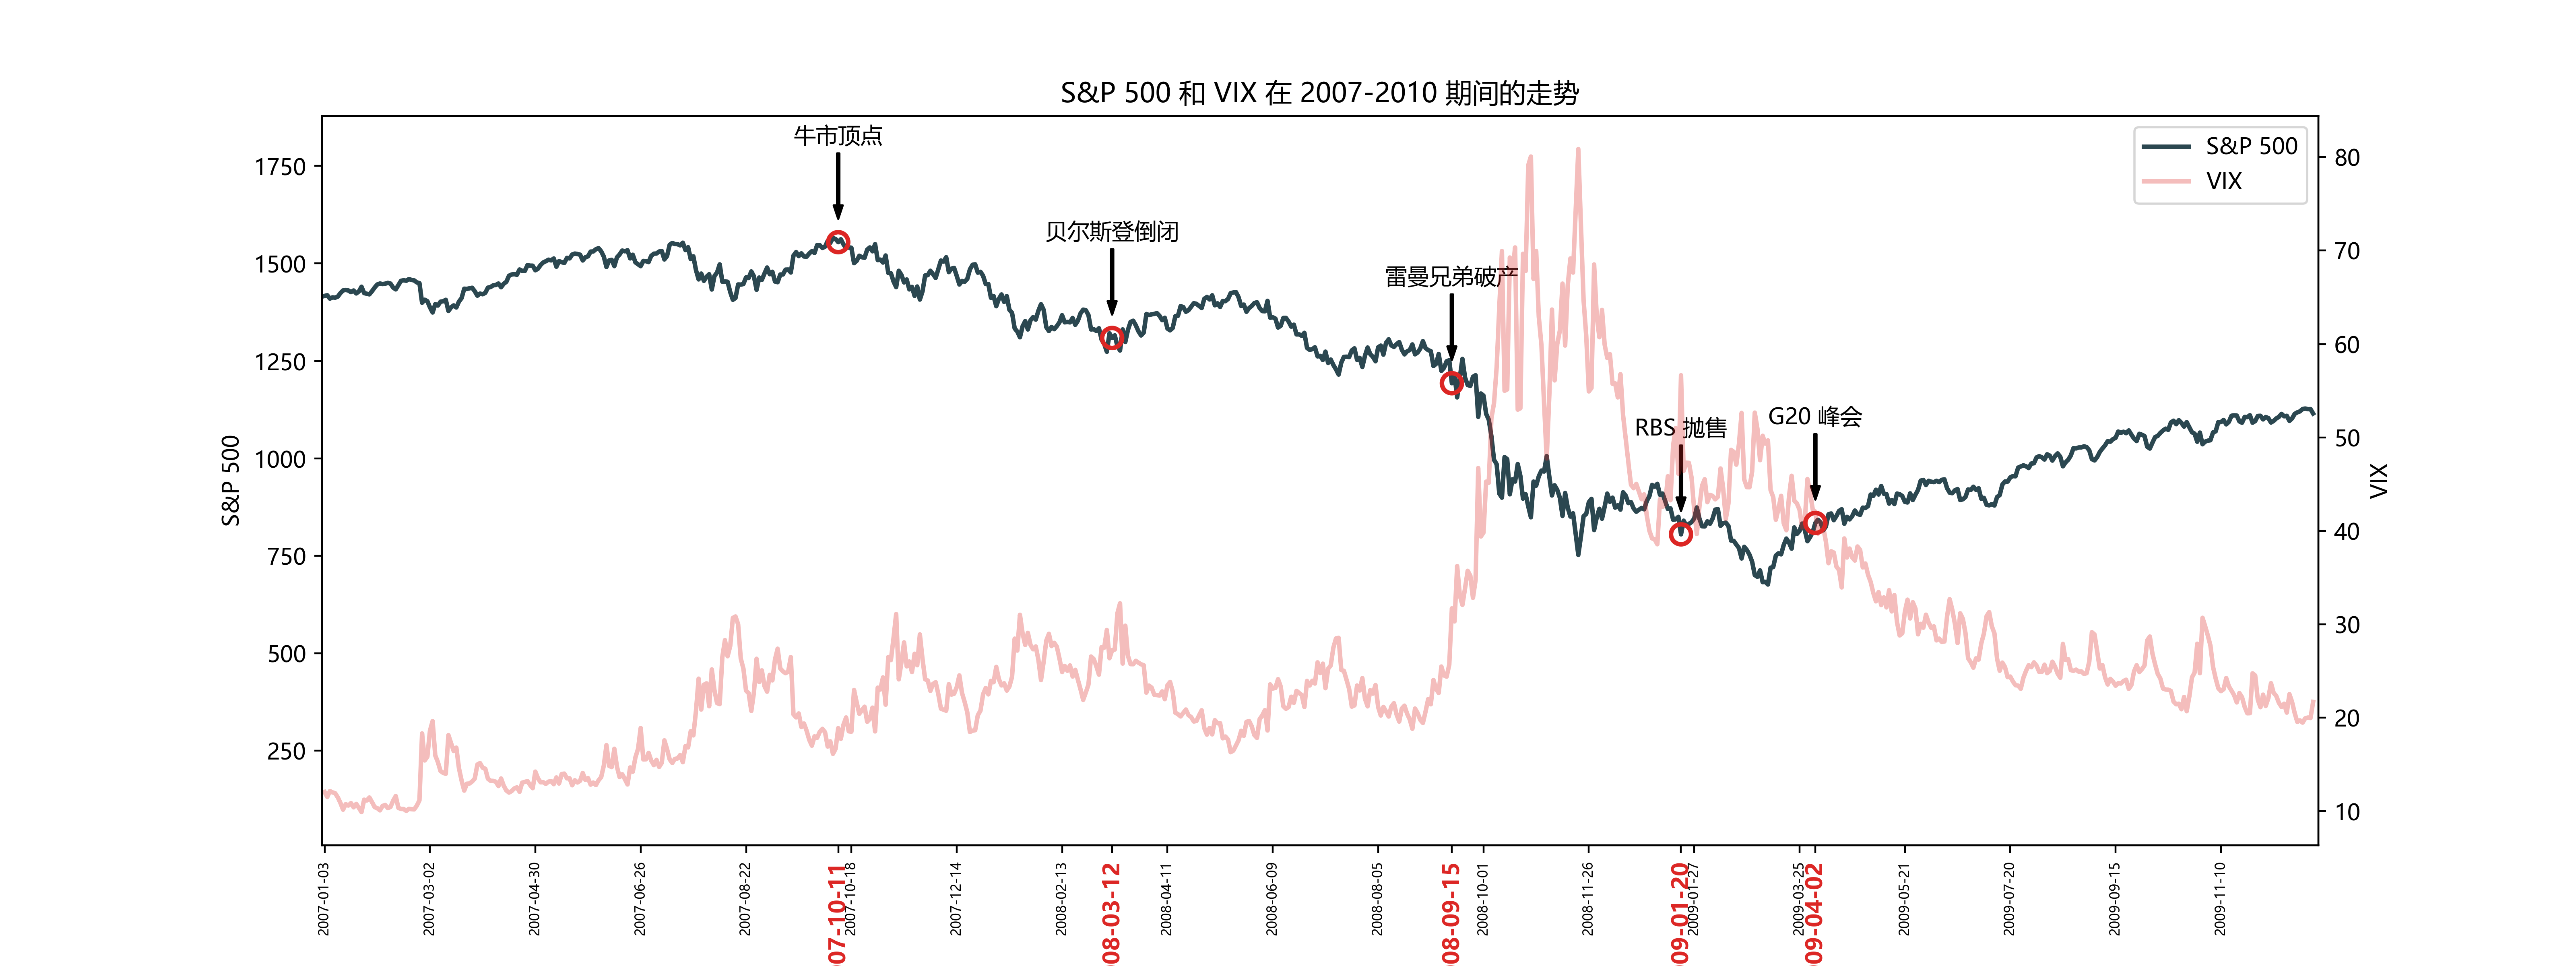

In [59]:
from IPython.display import Image
Image('financial_crisis.png')

***
# <div style="text-align: center"><font color='green'>Cheatsheet</font> <a name="cs"></a></div> 
***
<img src="Matplotlib Cheatsheet.png" style="width:100%;height:100%;">